In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('horse.csv')

names = df.columns

df['age'] = pd.Series(np.where(df.age.values == 'young', 1,0), df.index)
df['temp_of_extremities'] = pd.Series(np.where(df.temp_of_extremities.values == 'normal', 1,0), df.index)
df['surgery'] = pd.Series(np.where(df.surgery.values == 'yes', 1,0), df.index)
df['capillary_refill_time'] = pd.Series(np.where(df.capillary_refill_time.values == 
                                                'less_3_sec', 1,0), df.index)
X = df[[ 'surgery', 'age', 'total_protein', 'packed_cell_volume', 'respiratory_rate', 'pulse', 'rectal_temp', 'outcome']].copy()
X = X.dropna()
# Modify dataset

y = X[['outcome']].copy()
X = X.drop('outcome', 1)
y = pd.Series(np.where(y.outcome.values == 'lived', 1,0), y.index)

# Split data using sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

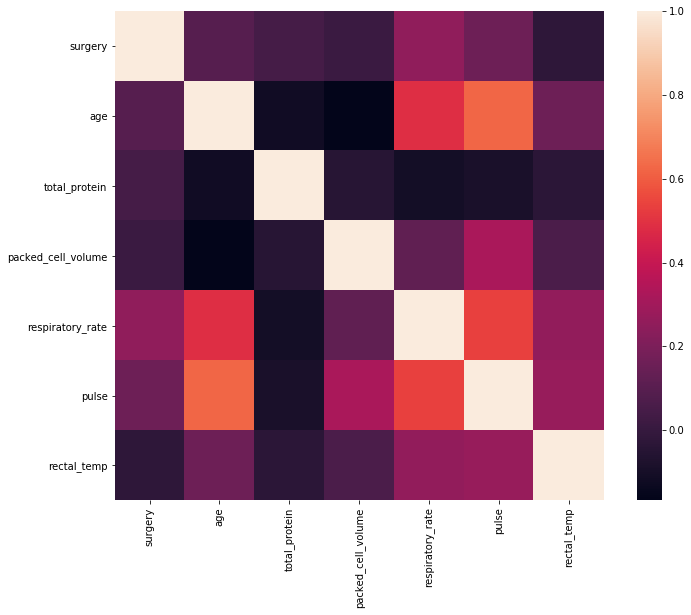

In [2]:
# Inspect correlations
corrmat = X_train.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [3]:
# Initiate model
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_train)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y_train))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))

Coefficients
[[-0.70333163  1.82795314  0.00649323 -0.07668589  0.02046101 -0.04252006
   0.36898469]]
[-7.43850895]

 Accuracy by admission status
col_0   0   1
row_0        
0      34   8
1      21  89

 Percentage accuracy
0.7894736842105263


/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.
# 'total_protein', 'respiratory_rate', 'pulse', 'rectal_temp'
ridgeregr = linear_model.Ridge(alpha=3, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
#origparams = ridgeregr.coef_[0]
#print(origparams)

X2_train = X_train.copy()
X2_train['protien_pulse'] = X_train['total_protein'] * X_train['pulse']
X2_train['protien_temp'] = X_train['total_protein'] * X_train['rectal_temp']
X2_train['protien_rate'] = X_train['total_protein'] * X_train['respiratory_rate']
X2_train['pulse_sqrt'] = ( X_train['pulse'] +100) ** 2
X2_train['pulse_sqrt'] = ( X_train['pulse'] +100) ** 3

X2_test = X_test.copy()
X2_test['protien_pulse'] = X2_test['total_protein'] * X2_test['pulse']
X2_test['protien_temp'] = X2_test['total_protein'] * X2_test['rectal_temp']
X2_test['protien_rate'] = X2_test['total_protein'] * X2_test['respiratory_rate']
X2_test['pulse_sqrt'] = ( X2_test['pulse'] +100) ** 2
X2_test['pulse_sqrt'] = ( X2_test['pulse'] +100) ** 3


ridgeregrBig = linear_model.Ridge(alpha=3, fit_intercept=False)
ridgeregrBig.fit(X2_train, y_train)
print(ridgeregrBig.score(X2_train, y_train))
#newparams = ridgeregrBig.coef_[0, 0:len(origparams)]
print(ridgeregr.score(X_test, y_test))
print(ridgeregrBig.score(X2_test, y_test))

0.32057186067805377
0.3345638180078069
0.25085392942366724
0.25665641320657995


,surgery,age,total_protein,packed_cell_volume,respiratory_rate,pulse,rectal_temp
186,1,0,6.1,32.0,30.0,80.0,38.4
13,0,1,6.1,37.0,28.0,92.0,38.0
179,1,0,7.5,47.0,30.0,84.0,38.4
148,0,0,63.0,34.0,24.0,48.0,38.7
149,0,0,64.0,33.0,14.0,44.0,38.9
272,1,0,7.0,65.0,28.0,120.0,37.7
275,1,0,75.0,37.0,16.0,36.0,38.0
183,0,0,65.0,43.0,32.0,68.0,38.2
41,0,1,8.5,47.0,72.0,150.0,39.0
49,0,0,5.5,73.0,48.0,84.0,37.2
